In [5]:
library(readxl)
library(factoextra)
library(tidyverse)
library(dplyr)
library(corrplot)
library(clusterSim)

data <- read.csv("tooth-data.csv")

In [6]:
data <- data[-c(1, 2, 356),] # remove first 2 rows which contain desciptive information and missing row

names <- data[, 1]

modded_data <- data %>% dplyr::select(-1, -6, -7) # remove columns with string values

modded_data[, c(1:4)] <- sapply(modded_data[, c(1:4)], as.numeric) # change type to numeric

modded_data <- modded_data[complete.cases(modded_data), ] # remove missing fields

modded_data

nrow(modded_data)

Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in lapply(X = X, FUN = FUN, ...):
“NAs introduced by coercion”


,CH..µm.,FABL..µm.,BW..µm.,PDM..dt.mm.
,<dbl>,<dbl>,<dbl>,<dbl>
3,2699,2391,839,4.00
4,3055,2331,871,4.00
5,3937,2588,920,3.00
6,3487,2611,972,2.80
7,3314,2817,865,3.00
8,3473,2463,981,2.20
9,3297,2239,841,2.84
10,2502,2255,639,3.50
11,3428,2768,841,3.36


[1] 459

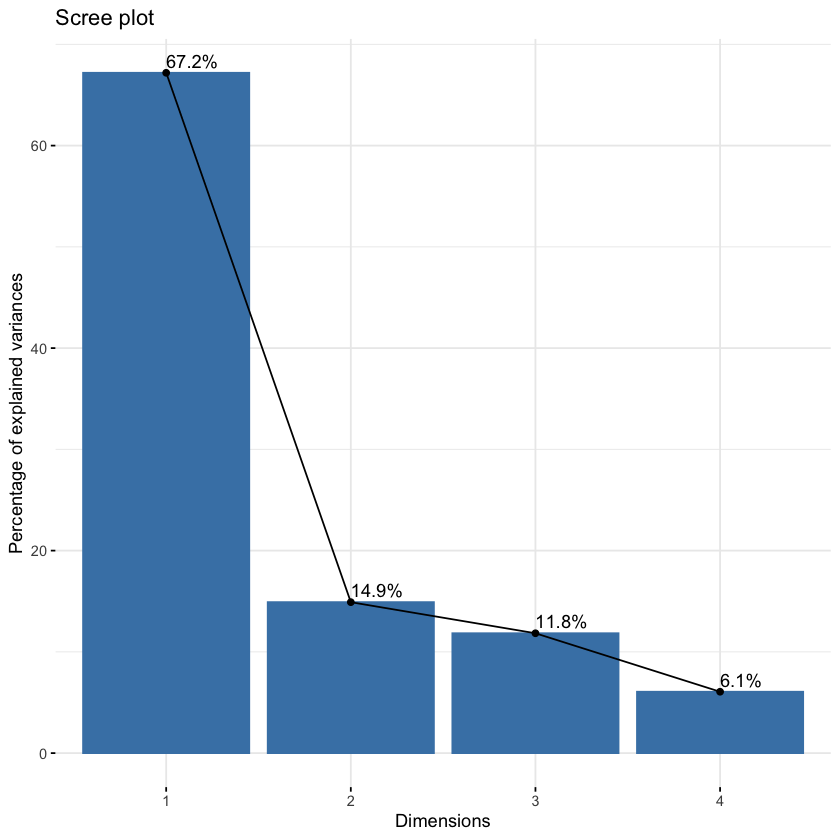

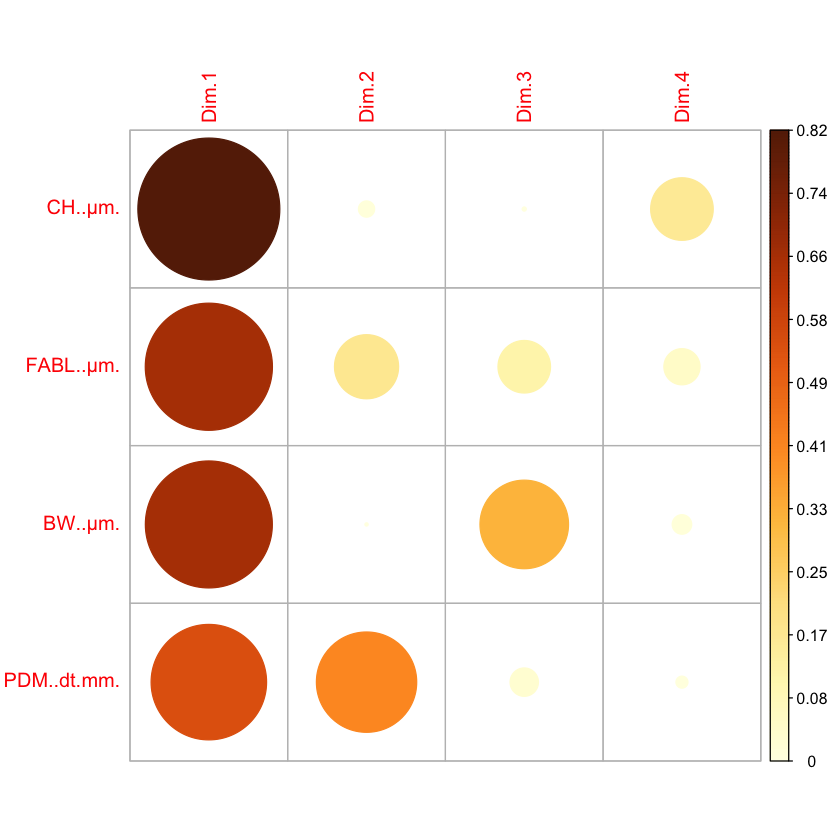

Warning message:
“ggrepel: 375 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


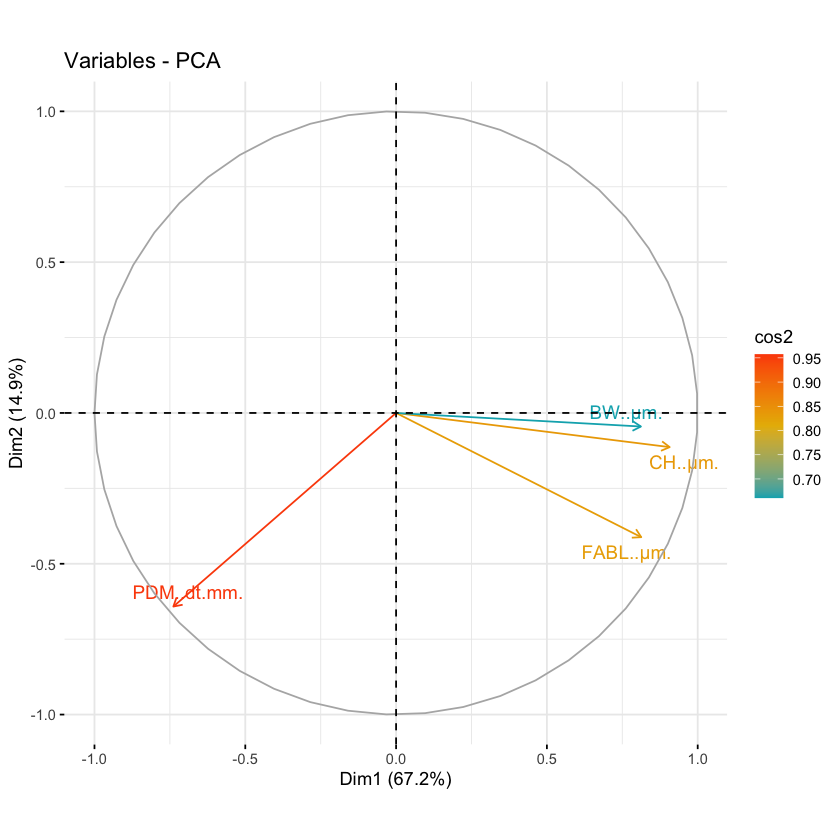

Warning message:
“ggrepel: 367 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


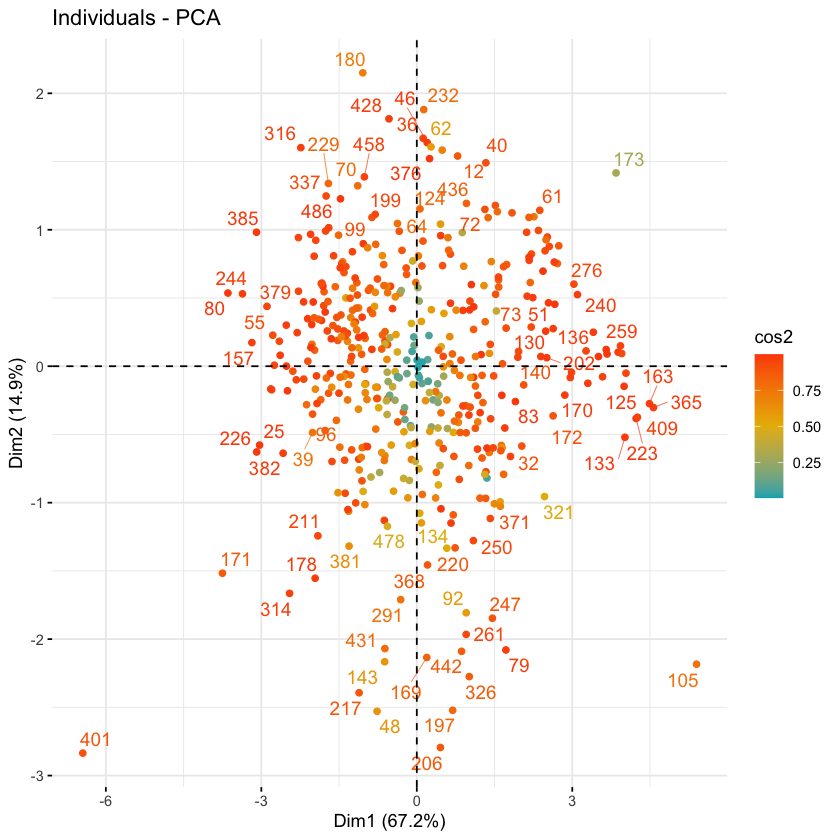

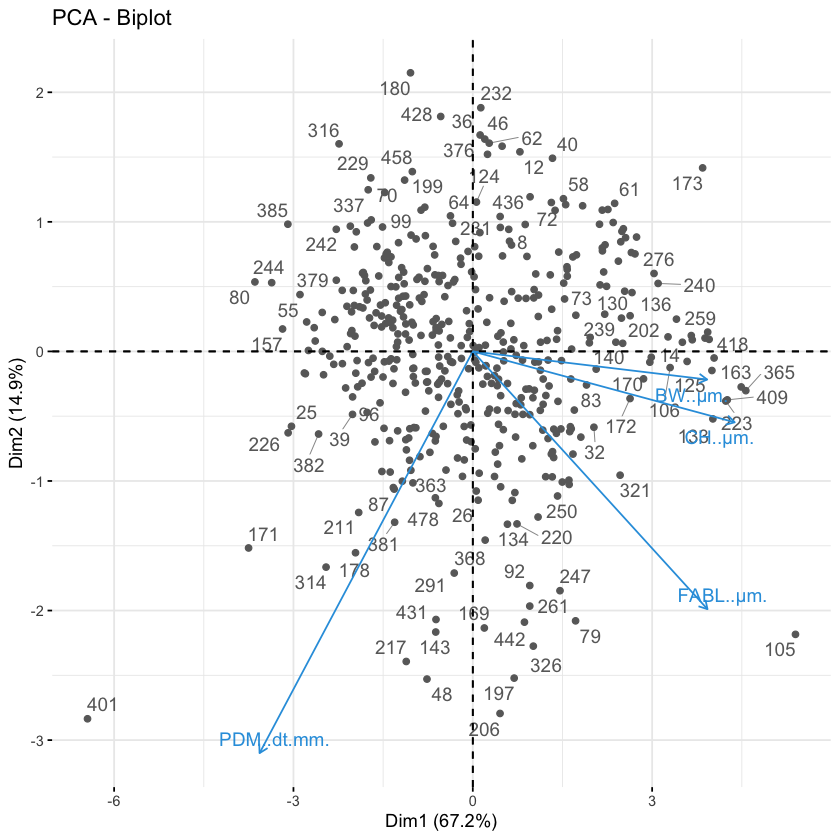

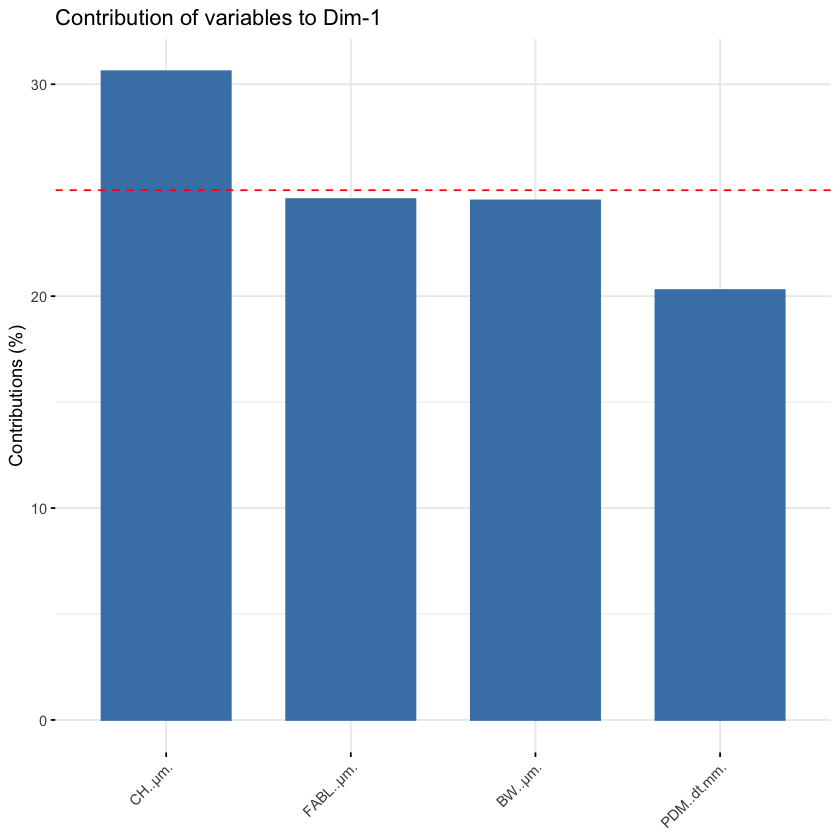

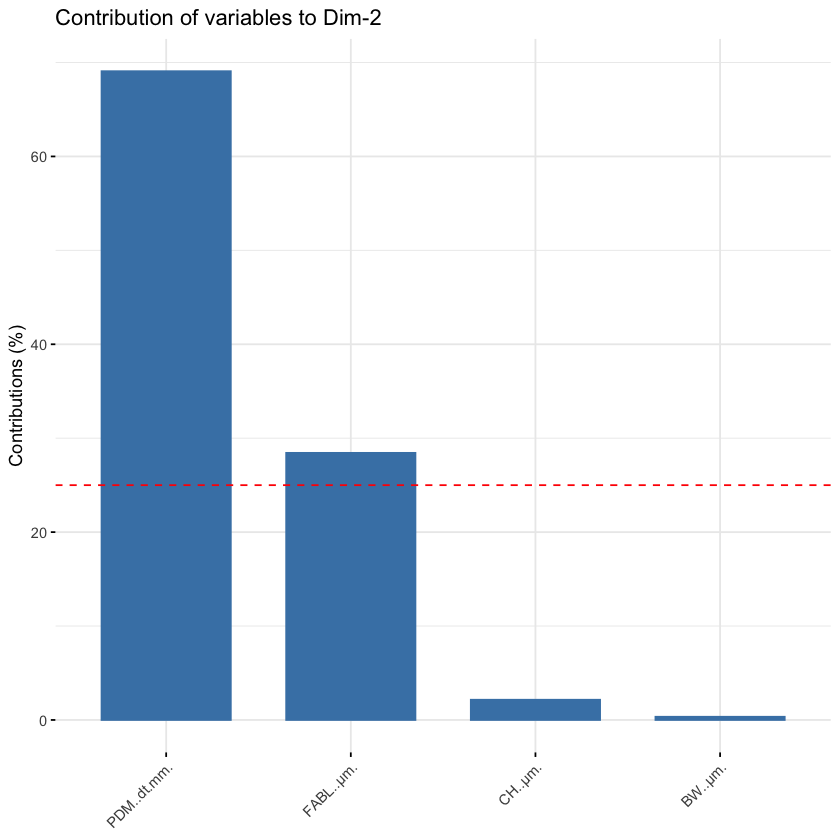

In [ ]:
# options(ggrepel.max.overlaps = Inf)

pca <- prcomp(modded_data, scale = TRUE)
var <- get_pca_var(pca)


fviz_eig(pca, addlabels = TRUE)
corrplot(var$cos2, is.corr = FALSE)

fviz_pca_var(pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping
             )

fviz_pca_ind(pca,
             col.ind = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

fviz_pca_biplot(pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

fviz_contrib(pca, choice = "var", axes = 1, top = 10)
fviz_contrib(pca, choice = "var", axes = 2, top = 10)

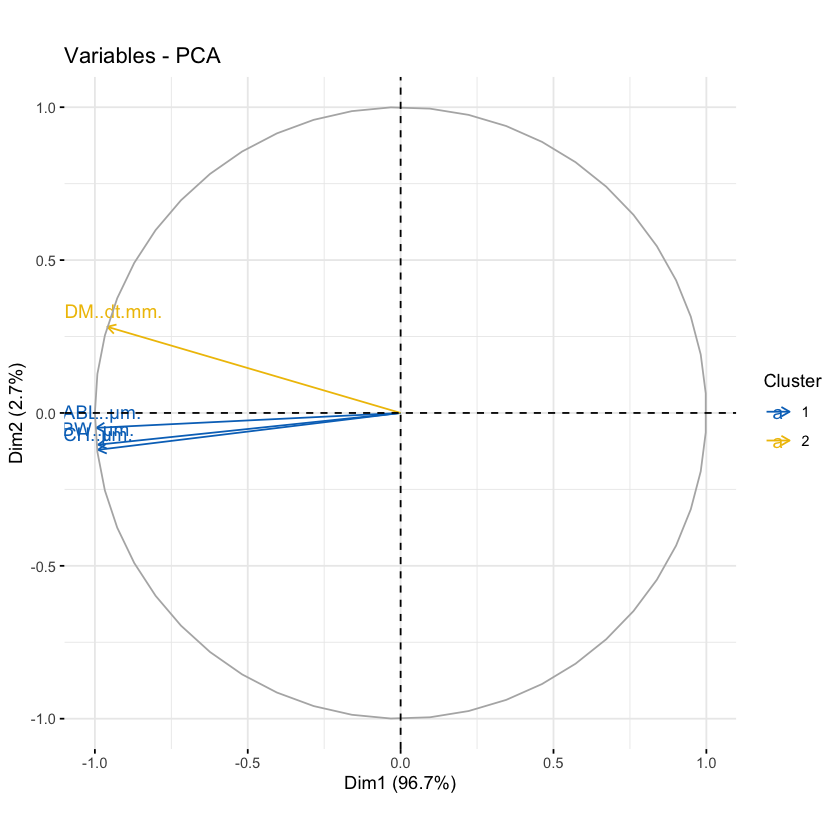

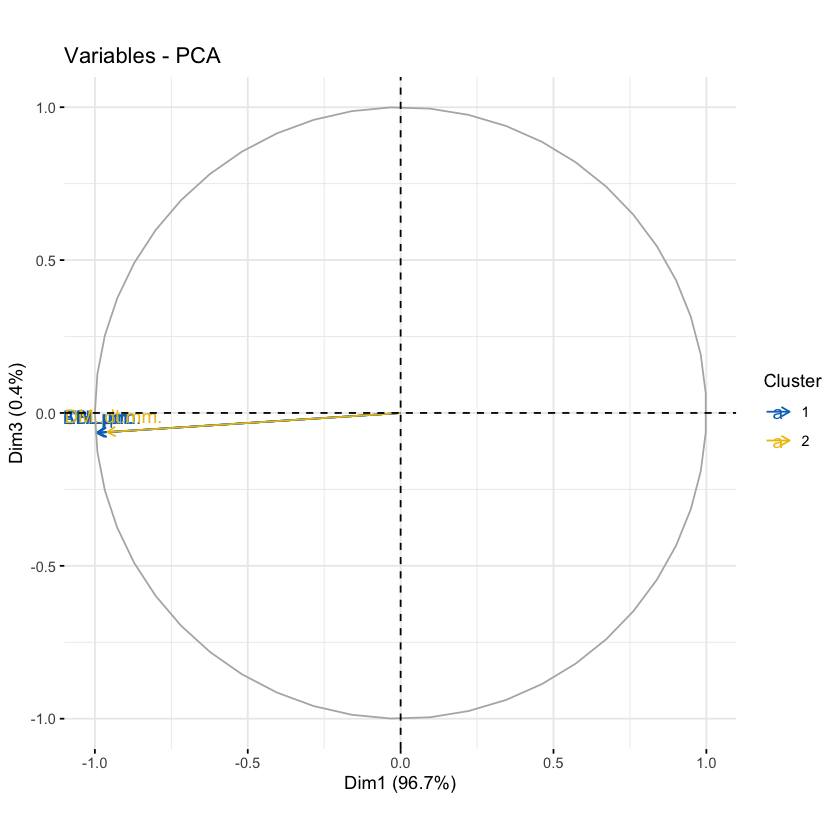

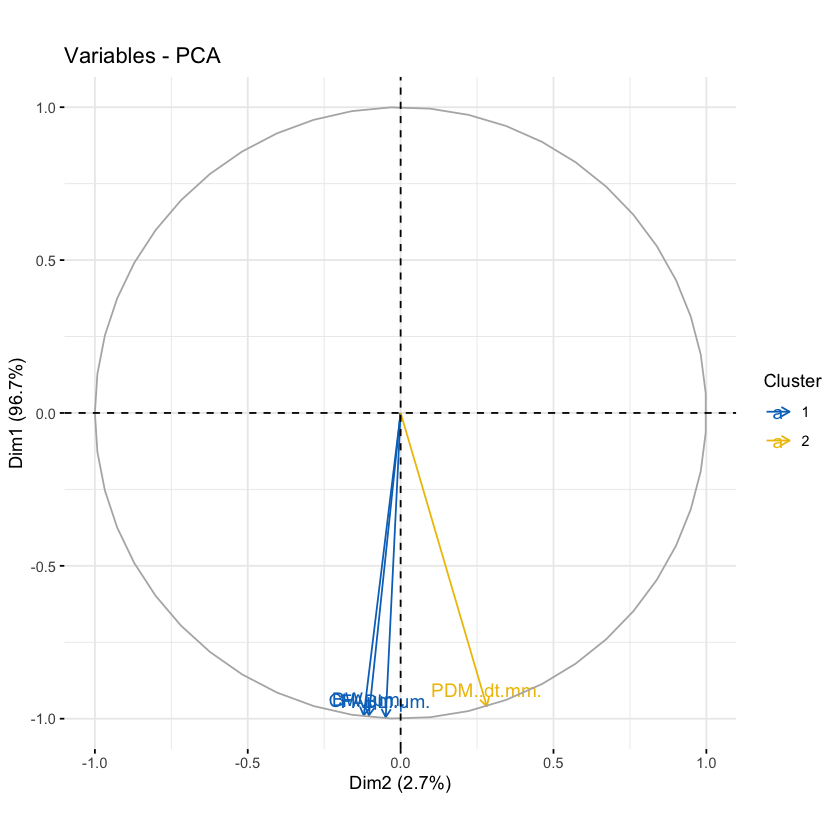

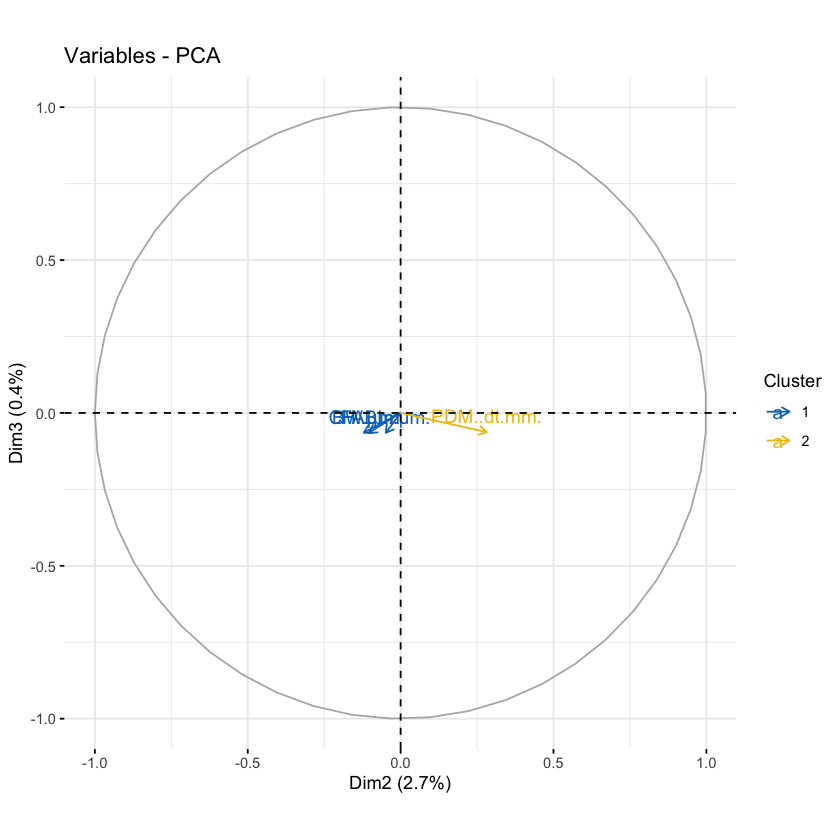

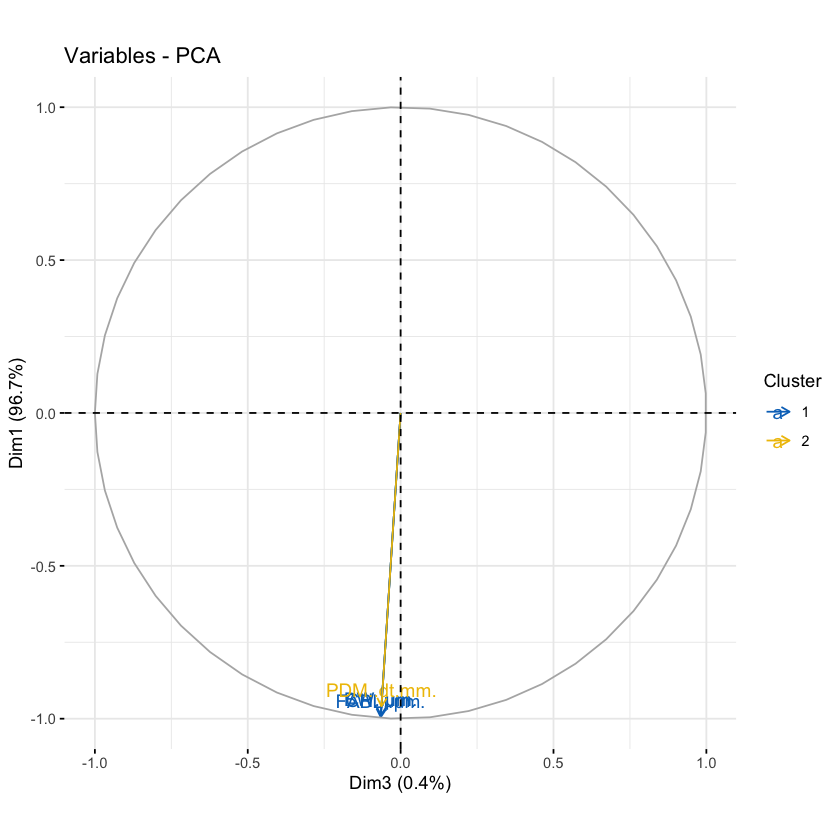

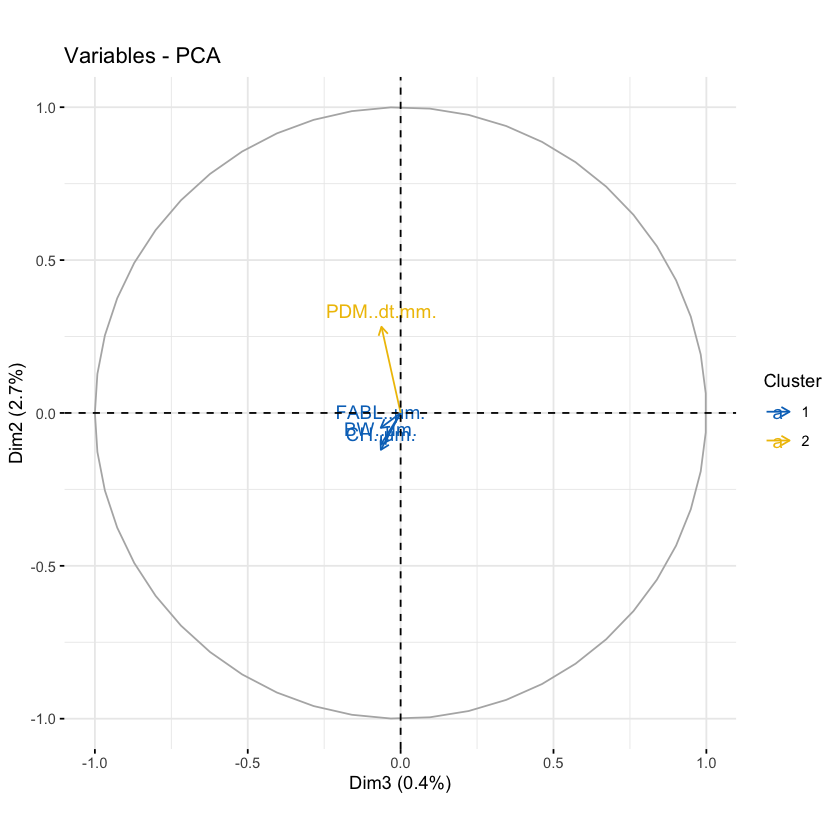

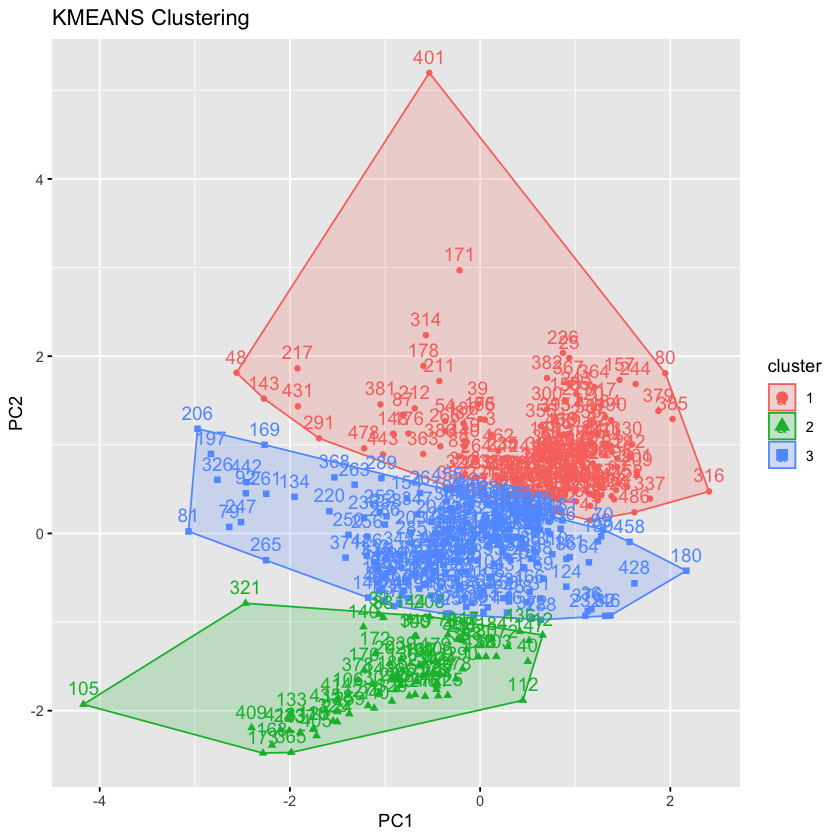

  cluster size ave.sil.width
1       1  177          0.40
2       2   76          0.50
3       3  206          0.32


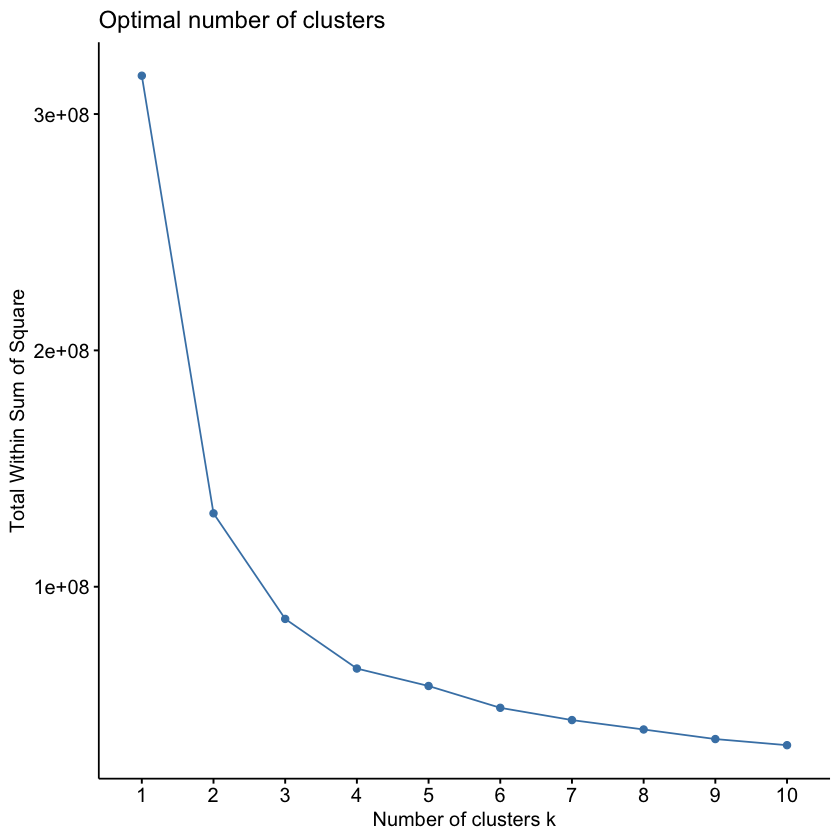

[1] 3

K-means clustering with 3 clusters of sizes 177, 76, 206

Cluster means:
        PC1         PC2
1 -1.831362  0.31046799
2 -2.128663 -0.51938174
3 -1.996228 -0.04493431

Clustering vector:
  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22 
  1   1   3   3   3   3   3   1   3   2   3   2   1   3   1   1   1   1   3   1 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
  1   1   1   3   1   1   3   1   3   2   3   1   1   3   1   1   1   2   1   1 
 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62 
  3   1   1   3   3   1   3   3   2   1   3   1   1   3   1   2   3   1   2   3 
 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 
  3   3   1   3   1   3   3   3   1   2   2   3   1   3   3   1   3   1   3   1 
 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 
  2   1   1   3   1   3   1   3   3   3   3   1   3   1   1   1   3   2   1   3 
1

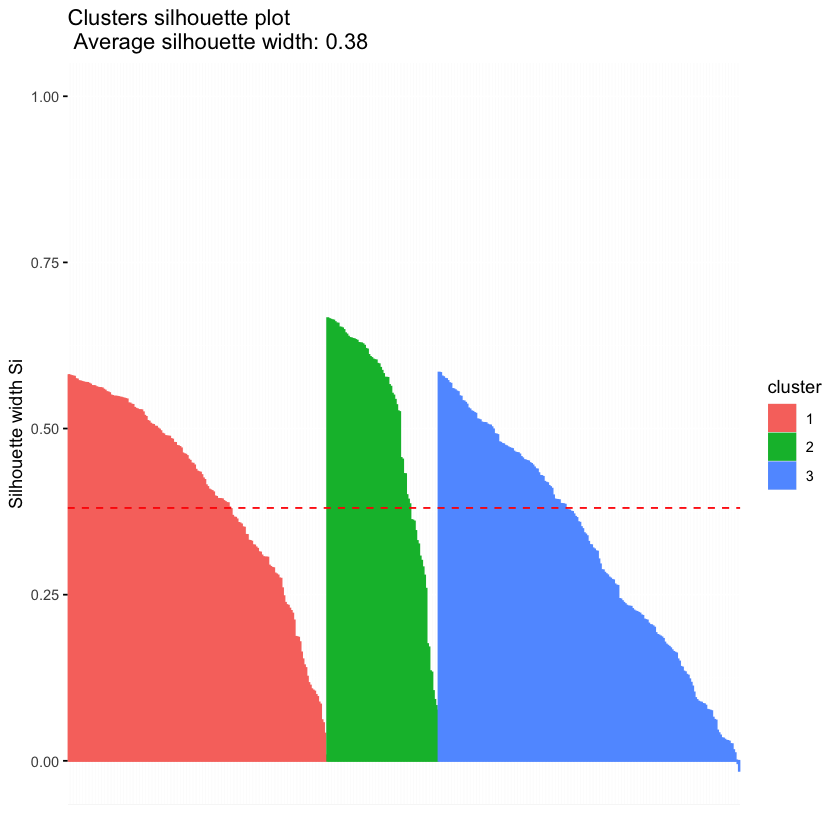

In [13]:
set.seed(123)

pcal <- prcomp(modded_data, center=FALSE, scale=TRUE, rank.=2)

# var <- get_pca_var(pcal)

km <- kmeans(var$coord, centers = 2, nstart = 25)

grp <- as.factor(km$cluster)
# Color variables by groups

for (i in 1:3) {
    for (k in 1:3) {
        if (k == i) {
            next
        }
        print(fviz_pca_var(pcal, col.var = grp, axes = c(i, k), 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster"))
    }
}

results <- pcal$x

km1<-eclust(results, "kmeans", hc_metric="eucliden", k=3)

fviz_nbclust(modded_data, kmeans, method = "wss")

fviz_silhouette(km1)
km1$nbclust

km1


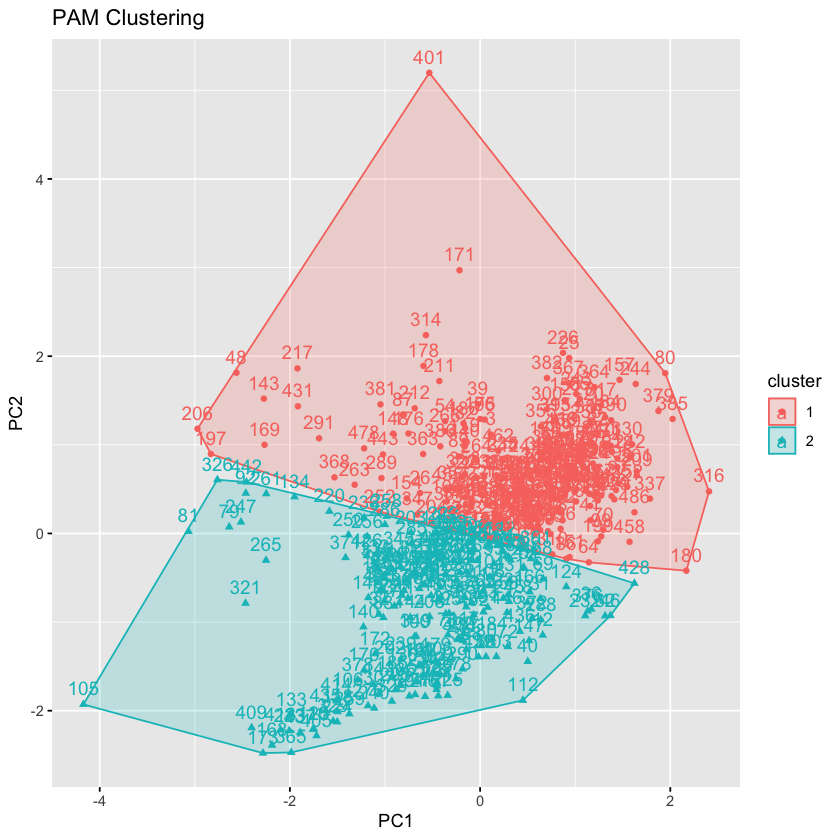

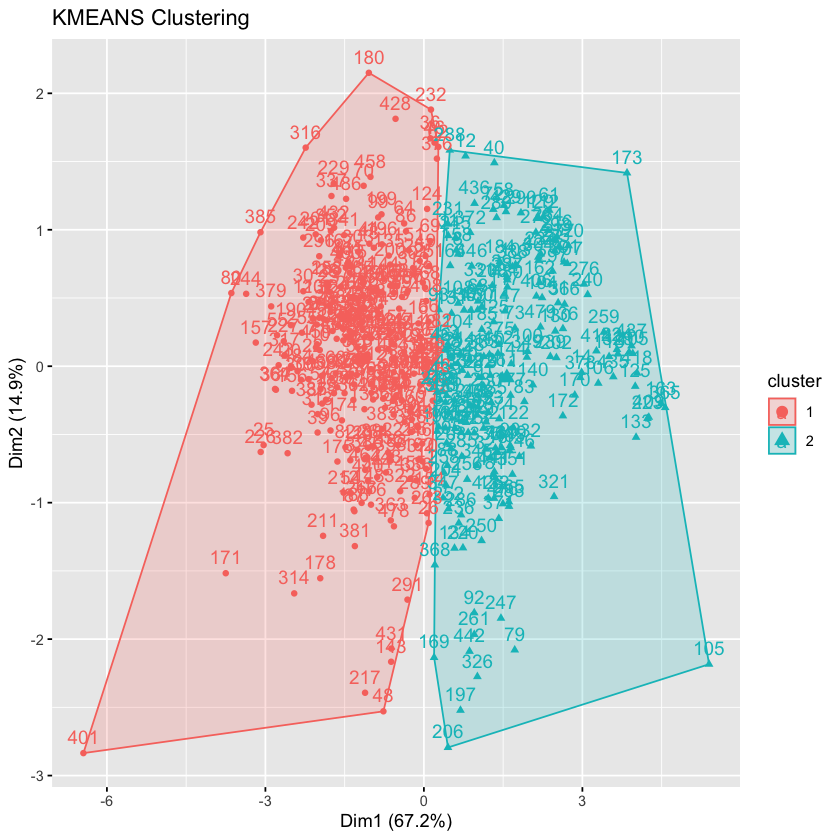

In [6]:
data_raw <- as.matrix(modded_data)

df.n<-data.Normalization(data_raw, type="n1", normalization="column")

pam1<-eclust(results, "pam", k=2)

km1<-eclust(df.n, "kmeans", hc_metric="eucliden", k=2)

# hopkins(